In [1]:
from random import shuffle, random, choices
from random import shuffle, random, choices
from collections import Counter
from itertools import combinations
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from dummy_hangman import Hangman
import numpy as np
import pickle

## Creating the Data

In [2]:
with open('words_250000_train.txt', 'r') as file:
    words = [line.strip() for line in file]
shuffle(words)

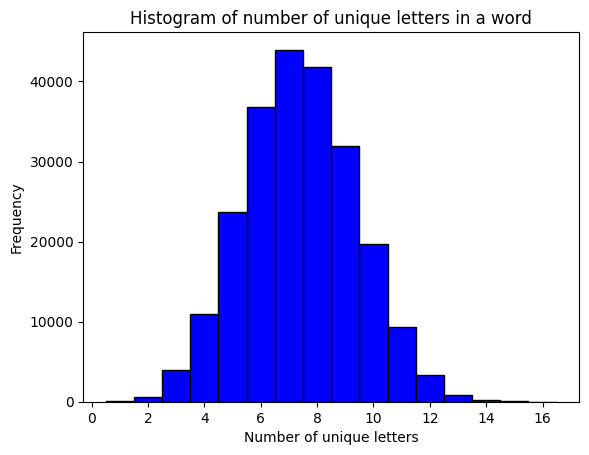

In [3]:
import matplotlib.pyplot as plt

word_lengths = [len(set(word)) for word in words]

plt.hist(word_lengths, bins=range(min(word_lengths), max(word_lengths) + 2), align='left', color='blue', edgecolor='black')
plt.title('Histogram of number of unique letters in a word')
plt.xlabel('Number of unique letters')
plt.ylabel('Frequency')

plt.show()

In [4]:
letter_count = Counter("".join(words)).most_common()
count_sum = sum(count for _, count in letter_count)
letter_frequency = {letter: count / count_sum for letter, count in letter_count}

In [5]:
letter_frequency

{'e': 0.11001079658462706,
 'i': 0.08694968716260673,
 'a': 0.0846392933555352,
 'n': 0.07165985957850962,
 'o': 0.0706211471865343,
 'r': 0.07023333612582398,
 's': 0.06987282244560056,
 't': 0.06460866381205095,
 'l': 0.05762147569638912,
 'c': 0.042060086240896556,
 'u': 0.03638270174411436,
 'd': 0.03523056402977109,
 'p': 0.030961347850519544,
 'm': 0.0292698515493146,
 'h': 0.027321383355939956,
 'g': 0.02440291686629837,
 'y': 0.019289364469917816,
 'b': 0.018750476527547293,
 'f': 0.012439604545672753,
 'v': 0.009910361050214943,
 'k': 0.008793992317199326,
 'w': 0.008345468117130236,
 'z': 0.004117668653100182,
 'x': 0.0028473991714774377,
 'q': 0.0018759889417370359,
 'j': 0.00178374262147099}

In [6]:
def all_combinations(iterable, start, end):
    result = []
    for r in range(start, min(end + 1, len(iterable))):
        result.extend(combinations(iterable, r))
    return result

def get_most_common_letters(word0):
    word_letter_frequency = Counter(word0).most_common()
    word_letter_frequency.sort(key=lambda pair: letter_frequency[pair[0]], reverse=True)
    word_letter_frequency.sort(key=lambda pair: pair[1], reverse=True)
    return [letter for letter, _ in word_letter_frequency]

In [7]:
data = set()

for i, word in enumerate(words):
    most_common_letters = get_most_common_letters(word)
    word_letters = set(word)

    x_append = (27,) * len(word) + (0,) * (30 - len(word))
    y_append = ord(most_common_letters[0]) - 96

    data.add((x_append, y_append))
    
    for letter_combination in all_combinations(word_letters, 1, int(0.75 * len(word_letters))):
        if random() < 0.5:
            continue
            
        x_append = tuple(27 if letter not in letter_combination else ord(letter) - 96 for letter in word) + (0,) * (30 - len(word))

        for letter in most_common_letters:
            if letter not in letter_combination:
                y_append = ord(letter) - 96
                break

        data.add((x_append, y_append))
    
    '''x_append = (27,) * len(word) + (0,) * (30 - len(word))
    
    most_common_letters = get_most_common_letters(word)
    y_append = ord(most_common_letters[0]) - 96
    
    data.append((x_append, y_append))
    
    index = 0
    letter_combination = {most_common_letters[index]}
    while len(letter_combination) < len(set(word)):
        x_append = tuple(27 if letter not in letter_combination else ord(letter) - 96 for letter in word) + (0,) * (30 - len(word))
        y_append = ord(most_common_letters[index + 1]) - 96
        data.append((x_append, y_append))
        letter_combination.add(y_append)
        index += 1'''
    
    if not i % 1000:
        print(f'Completed {i} out of {len(words)}')
        

Completed 0 out of 227300
Completed 1000 out of 227300
Completed 2000 out of 227300
Completed 3000 out of 227300
Completed 4000 out of 227300
Completed 5000 out of 227300
Completed 6000 out of 227300
Completed 7000 out of 227300
Completed 8000 out of 227300
Completed 9000 out of 227300
Completed 10000 out of 227300
Completed 11000 out of 227300
Completed 12000 out of 227300
Completed 13000 out of 227300
Completed 14000 out of 227300
Completed 15000 out of 227300
Completed 16000 out of 227300
Completed 17000 out of 227300
Completed 18000 out of 227300
Completed 19000 out of 227300
Completed 20000 out of 227300
Completed 21000 out of 227300
Completed 22000 out of 227300
Completed 23000 out of 227300
Completed 24000 out of 227300
Completed 25000 out of 227300
Completed 26000 out of 227300
Completed 27000 out of 227300
Completed 28000 out of 227300
Completed 29000 out of 227300
Completed 30000 out of 227300
Completed 31000 out of 227300
Completed 32000 out of 227300
Completed 33000 out of 

In [8]:
len(data)

44143664

In [9]:
data2 = set()

for i, word in enumerate(words):
    most_common_letters = get_most_common_letters(word)
    word_letters = set(word)

    letters = list(letter_frequency.keys())
    probabilities = list(letter_frequency.values())
    
    for _ in range(100):
        sampled_letters = choices(letters, weights=probabilities, k=len(word_letters))
        x_append = tuple(27 if letter not in sampled_letters else ord(letter) - 96 for letter in word) + (0,) * (30 - len(word))

        for letter in most_common_letters:
            if letter not in sampled_letters:
                y_append = ord(letter) - 96
                break

        data2.add((x_append, y_append))

    
    f'''or letter_combination in all_combinations(word_letters, int(0.75 * len(word_letters)), len(word_letters)):
        x_append = tuple(27 if letter not in letter_combination else ord(letter) - 96 for letter in word) + (0,) * (30 - len(word))
        
        for letter in most_common_letters:
            if letter not in letter_combination:
                y_append = ord(letter) - 96
                break

        data2.add((x_append, y_append))'''

    if not i % 1000:
        print(f'Completed {i} out of {len(words)}')

Completed 0 out of 227300
Completed 1000 out of 227300
Completed 2000 out of 227300
Completed 3000 out of 227300
Completed 4000 out of 227300
Completed 5000 out of 227300
Completed 6000 out of 227300
Completed 7000 out of 227300
Completed 8000 out of 227300
Completed 9000 out of 227300
Completed 10000 out of 227300
Completed 11000 out of 227300
Completed 12000 out of 227300
Completed 13000 out of 227300
Completed 14000 out of 227300
Completed 15000 out of 227300
Completed 16000 out of 227300
Completed 17000 out of 227300
Completed 18000 out of 227300
Completed 19000 out of 227300
Completed 20000 out of 227300
Completed 21000 out of 227300
Completed 22000 out of 227300
Completed 23000 out of 227300
Completed 24000 out of 227300
Completed 25000 out of 227300
Completed 26000 out of 227300
Completed 27000 out of 227300
Completed 28000 out of 227300
Completed 29000 out of 227300
Completed 30000 out of 227300
Completed 31000 out of 227300
Completed 32000 out of 227300
Completed 33000 out of 

In [10]:
len(data2)

9243014

## Manipulating the Data

In [11]:
df = pd.DataFrame(data, columns=['Data', 'Label'])
df = pd.DataFrame(df['Data'].tolist(), columns=[
    'column1', 'column2', 'column3', 'column4', 'column5',
    'column6', 'column7', 'column8', 'column9', 'column10',
    'column11', 'column12', 'column13', 'column14', 'column15',
    'column16', 'column17', 'column18', 'column19', 'column20',
    'column21', 'column22', 'column23', 'column24', 'column25',
    'column26', 'column27', 'column28', 'column29', 'column30'])
df['Label'] = [label for _, label in data]
df

column1  column2  column3  column4  column5  column6  column7  \
0               4       27       27       27       27       13       13   
1              27       16        8        9       27       12        5   
2              19       27       27        6       27       27        7   
3              15        6        6       27       27        3       27   
4              24        9       27       27        9       27       27   
...           ...      ...      ...      ...      ...      ...      ...   
44143659        1       14       27       27       27       15       27   
44143660       27       27        5        3        9       27        9   
44143661       27       27       12       25       19       27       27   
44143662       27       27       27        8       27        7       27   
44143663        1       27       16       27       27        3       25   

          column8  column9  column10  ...  column22  column23  column24  \
0              27       27         4  ...         0         0         0   
1               9       27         9  ...         0         0         0   
2              27       27        27  ...         0         0         0   
3              20        5         0  ...         0         0         0   
4              13       27        27  ...         0         0         0   
...           ...      ...       ...  ...       ...       ...       ...   
44143659       15       27        27  ...         0         0         0   
44143660       27        1        27  ...         0         0         0   
44143661       18       27        27  ...         0         0         0   
44143662        1       27         8  ...         0         0         0   
44143663       27       27        27  ...         0         0         0   

          column25  column26  column27  column28  column29  column30  Label  
0                0         0         0         0         0         0      5  
1                0         0         0         0         0         0     15  
2                0         0         0         0         0         0      9  
3                0         0         0         0         0         0      1  
4                0         0         0         0         0         0      8  
...            ...       ...       ...       ...       ...       ...    ...  
44143659         0         0         0         0         0         0     20  
44143660         0         0         0         0         0         0     20  
44143661         0         0         0         0         0         0     15  
44143662         0         0         0         0         0         0     15  
44143663         0         0         0         0         0         0      9  

[44143664 rows x 31 columns]

In [12]:
data2_list = list(data2)
df2 = pd.DataFrame(data2_list, columns=['Data', 'Label'])
df2 = pd.DataFrame(df2['Data'].tolist(), columns=[
    'column1', 'column2', 'column3', 'column4', 'column5',
    'column6', 'column7', 'column8', 'column9', 'column10',
    'column11', 'column12', 'column13', 'column14', 'column15',
    'column16', 'column17', 'column18', 'column19', 'column20',
    'column21', 'column22', 'column23', 'column24', 'column25',
    'column26', 'column27', 'column28', 'column29', 'column30'])
df2['Label'] = [label for _, label in data2_list]
df2

column1  column2  column3  column4  column5  column6  column7  \
0             27       27       27       20       12        9       27   
1             27       27        1       14       27        1       27   
2             27       27       27       14       18        9       27   
3             18        5       27        1       18       13       27   
4             12        5       27        5       12       27        5   
...          ...      ...      ...      ...      ...      ...      ...   
9243009       27        9       27       27       19       27       27   
9243010       27       14       27        5       27       12       27   
9243011       16       18       15       27       15       14       27   
9243012       21       14       27       27       27       20       27   
9243013       27       15       27       16       21       27       27   

         column8  column9  column10  ...  column22  column23  column24  \
0             27        0         0  ...         0         0         0   
1             21       27         0  ...         0         0         0   
2              5        0         0  ...         0         0         0   
3             27        9        27  ...         0         0         0   
4              1       27         5  ...         0         0         0   
...          ...      ...       ...  ...       ...       ...       ...   
9243009        0        0         0  ...         0         0         0   
9243010       19        5        27  ...         0         0         0   
9243011        5       19        19  ...         0         0         0   
9243012       14        9        14  ...         0         0         0   
9243013       27        9        15  ...         0         0         0   

         column25  column26  column27  column28  column29  column30  Label  
0               0         0         0         0         0         0     18  
1               0         0         0         0         0         0     19  
2               0         0         0         0         0         0     15  
3               0         0         0         0         0         0     14  
4               0         0         0         0         0         0      4  
...           ...       ...       ...       ...       ...       ...    ...  
9243009         0         0         0         0         0         0     15  
9243010         0         0         0         0         0         0     20  
9243011         0         0         0         0         0         0      3  
9243012         0         0         0         0         0         0      5  
9243013         0         0         0         0         0         0      1  

[9243014 rows x 31 columns]

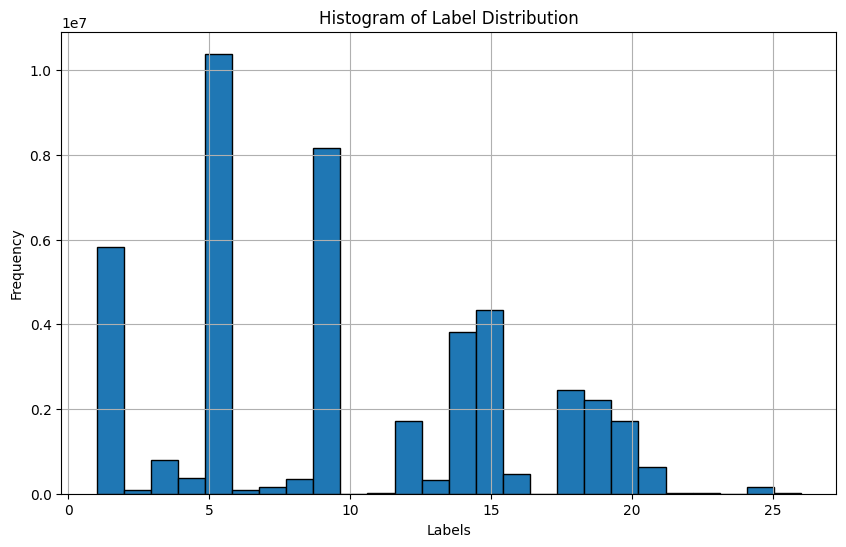

In [13]:
plt.figure(figsize=(10, 6)) 
plt.hist(df['Label'], bins=len(df['Label'].unique()), edgecolor='black')
plt.title('Histogram of Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

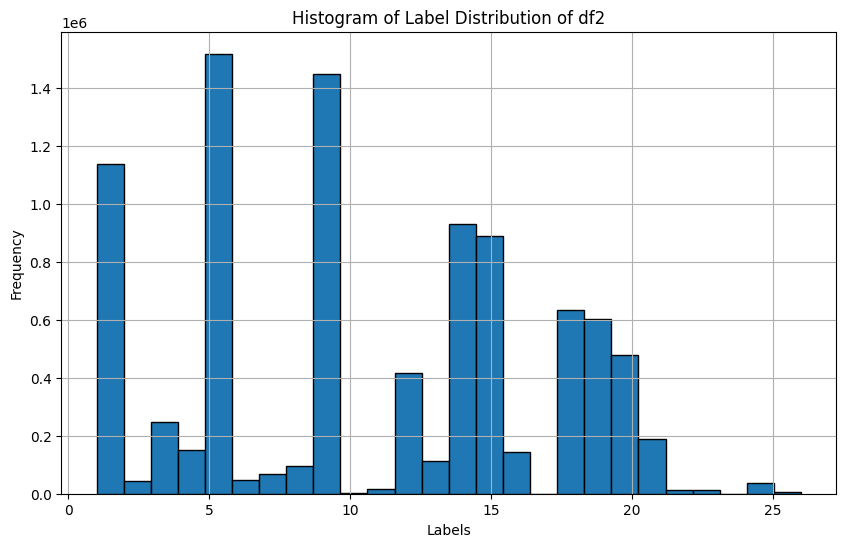

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df2['Label'], bins=len(df2['Label'].unique()), edgecolor='black')
plt.title('Histogram of Label Distribution of df2')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
label_counts = df['Label'].value_counts()
print(label_counts)

# Threshold for the maximum number of samples per label
threshold = 300000

def sample_rows(group, threshold0, bias):
    if len(group) > threshold:
        return group.sample(n=threshold0 + len(group) // bias, random_state=42)
    return group

df = df.groupby('Label').apply(sample_rows, threshold, 75).reset_index(drop=True)
new_label_counts = df['Label'].value_counts()
print(new_label_counts)
print(len(df))

Label
5     10386828
9      8161002
1      5819480
15     4329091
14     3828463
18     2444073
19     2212480
12     1726228
20     1725261
3       806965
21      620526
16      470981
4       365412
8       346324
13      326582
25      153017
7       149963
6        95637
2        87474
11       25744
22       25485
23       23737
26        9332
10        1426
17        1379
24         774
Name: count, dtype: int64
Label
5     438491
9     408813
1     377593
15    357721
14    351046
18    332587
19    329499
12    323016
20    323003
3     310759
21    308273
16    306279
4     304872
8     304617
13    304354
25    153017
7     149963
6      95637
2      87474
11     25744
22     25485
23     23737
26      9332
10      1426
17      1379
24       774
Name: count, dtype: int64
5654891


In [16]:
label_counts = df2['Label'].value_counts()
print(label_counts)

# Threshold for the maximum number of samples per label
threshold = 250000

df2 = df2.groupby('Label').apply(sample_rows, threshold, 50).reset_index(drop=True)
new_label_counts = df2['Label'].value_counts()
print(new_label_counts)
print(len(df2))

Label
5     1518538
9     1447030
1     1137478
14     932426
15     888010
18     635350
19     603947
20     479992
12     417288
3      247901
21     187908
4      150947
16     144098
13     111210
8       96822
7       67083
6       45725
2       43094
25      37426
11      15625
23      13943
22      12687
26       6302
10        850
24        708
17        626
Name: count, dtype: int64
Label
5     280370
9     278940
1     272749
14    268648
15    267760
18    262707
19    262078
20    259599
12    258345
3     247901
21    187908
4     150947
16    144098
13    111210
8      96822
7      67083
6      45725
2      43094
25     37426
11     15625
23     13943
22     12687
26      6302
10       850
24       708
17       626
Name: count, dtype: int64
3594151


In [17]:
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
X2 = df2.drop('Label', axis=1)
y2 = df2['Label']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [19]:
del data, data2, data2_list, df, df2

## Machine Learning

Hyperparameter Grid Search

In [20]:
'''param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Method for sampling data points (with or without replacement)
}

rf = RandomForestClassifier()

# Grid search of parameters, using 3 fold cross validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

train_predictions = grid_search.best_estimator_.predict(X_train)

train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

test_predictions = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))'''

'param_grid = {\n    \'n_estimators\': [100, 200, 300],  # Number of trees in the forest\n    \'max_depth\': [10, 20, 30, None],  # Maximum depth of the tree\n    \'min_samples_split\': [2, 5, 10],  # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4],    # Minimum number of samples required to be at a leaf node\n    \'bootstrap\': [True, False]        # Method for sampling data points (with or without replacement)\n}\n\nrf = RandomForestClassifier()\n\n# Grid search of parameters, using 3 fold cross validation\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=3, n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\nprint("Best parameters found: ", grid_search.best_params_)\n\ntrain_predictions = grid_search.best_estimator_.predict(X_train)\n\ntrain_accuracy = accuracy_score(y_train, train_predictions)\nprint("Training Accuracy: {:.2f}%".format(train_accuracy * 100))\n\ntest_predictions = grid_search.best_estimator_

In [21]:
'''# Grid search of parameters, using 3 fold cross validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X2_train, y2_train)

print("Best parameters found: ", grid_search.best_params_)

train_predictions = grid_search.best_estimator_.predict(X2_train)

train_accuracy = accuracy_score(y2_train, train_predictions)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

test_predictions = grid_search.best_estimator_.predict(X2_test)
test_accuracy = accuracy_score(y2_test, test_predictions)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))'''

'# Grid search of parameters, using 3 fold cross validation\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=3, n_jobs=-1)\ngrid_search.fit(X2_train, y2_train)\n\nprint("Best parameters found: ", grid_search.best_params_)\n\ntrain_predictions = grid_search.best_estimator_.predict(X2_train)\n\ntrain_accuracy = accuracy_score(y2_train, train_predictions)\nprint("Training Accuracy: {:.2f}%".format(train_accuracy * 100))\n\ntest_predictions = grid_search.best_estimator_.predict(X2_test)\ntest_accuracy = accuracy_score(y2_test, test_predictions)\nprint("Test Accuracy: {:.2f}%".format(test_accuracy * 100))'

Training with the best parameters

In [22]:
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2)
model.fit(X_train.values, y_train.values)

RandomForestClassifier(max_depth=10, min_samples_leaf=4)

In [23]:
train_predictions = model.predict(X_train)

train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

C:\Users\aymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training Accuracy: 22.91%


C:\Users\aymen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test Accuracy: 22.64%


In [24]:
model2 = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2)
model2.fit(X2_train.values, y2_train.values)

RandomForestClassifier(max_depth=10, min_samples_leaf=4)

In [25]:
train_predictions2 = model2.predict(X2_train.values)

train_accuracy2 = accuracy_score(y2_train.values, train_predictions2)
print("Training Accuracy: {:.2f}%".format(train_accuracy2 * 100))

test_predictions2 = model2.predict(X2_test.values)
test_accuracy2 = accuracy_score(y2_test.values, test_predictions2)
print("Test Accuracy: {:.2f}%".format(test_accuracy2 * 100))

Training Accuracy: 20.54%
Test Accuracy: 19.96%


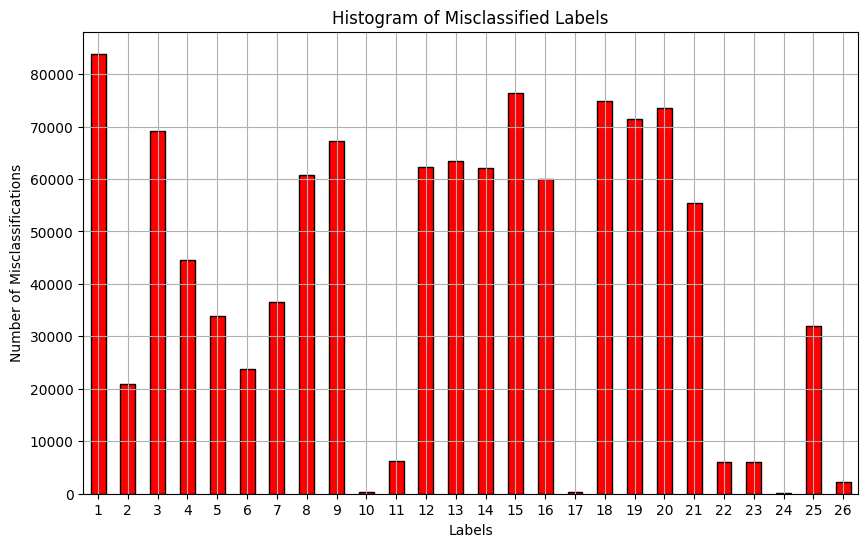

In [26]:
misclassified_indices = np.where(test_predictions != y_test)[0]
misclassified_labels = y_test.iloc[misclassified_indices]
predicted_labels = test_predictions[misclassified_indices]
misclassification_df = pd.DataFrame({
    'True_Labels': misclassified_labels,
    'Predicted_Labels': predicted_labels
})
misclassification_counts = misclassification_df['True_Labels'].value_counts()
sorted_labels = sorted(y_test.unique())
misclassification_counts = misclassification_counts.reindex(sorted_labels, fill_value=0)

plt.figure(figsize=(10, 6))
misclassification_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Histogram of Misclassified Labels')
plt.xlabel('Labels')
plt.ylabel('Number of Misclassifications')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

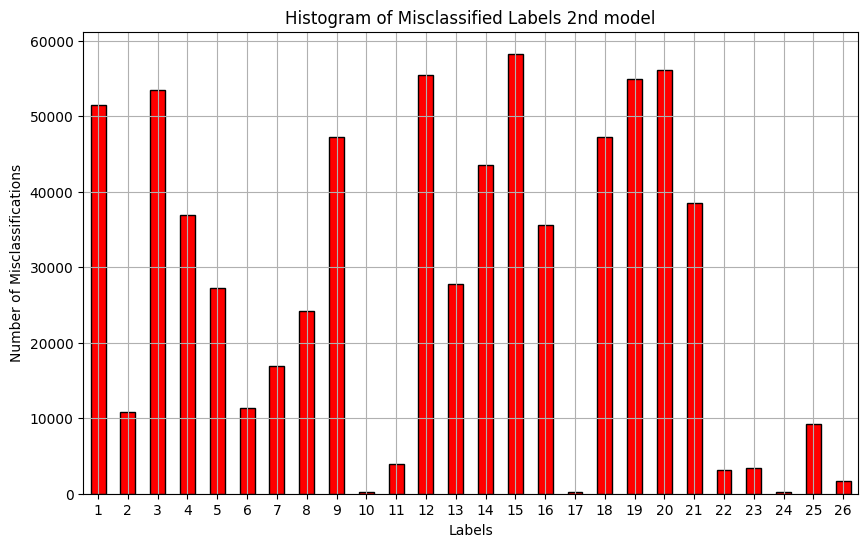

In [27]:
misclassified_indices2 = np.where(test_predictions2 != y2_test)[0]
misclassified_labels2 = y2_test.iloc[misclassified_indices2]
predicted_labels2 = test_predictions2[misclassified_indices2]
misclassification_df = pd.DataFrame({
    'True_Labels': misclassified_labels2,
    'Predicted_Labels': predicted_labels2
})
misclassification_counts = misclassification_df['True_Labels'].value_counts()
sorted_labels = sorted(y2_test.unique())
misclassification_counts = misclassification_counts.reindex(sorted_labels, fill_value=0)

plt.figure(figsize=(10, 6))
misclassification_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Histogram of Misclassified Labels 2nd model')
plt.xlabel('Labels')
plt.ylabel('Number of Misclassifications')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [28]:
with open('model1.pickle', 'wb') as file:
    pickle.dump(model, file)

with open('model2.pickle', 'wb') as file:
    pickle.dump(model2, file)

## Play the game

In [29]:
def count_correct(last_word, current_word):
    count = 0
    for i, letter in enumerate(last_word):
        if letter != current_word[i]:
            count += 1

    return count

def moving_average(data0, window_size0):
    """Compute the moving average of the given data using a window of the given size."""
    return np.convolve(data0, np.ones(window_size0) / window_size0, mode='valid')


def moving_average_wins(data0, window_size0):
    """ Returns the moving average of the given list using a sliding window """
    cumulative_sum = np.cumsum(data0, dtype=float)
    cumulative_sum[window_size0:] = cumulative_sum[window_size0:] - cumulative_sum[:-window_size0]
    return cumulative_sum[window_size0 - 1:] / window_size0

Completed 100 games
Completed 200 games
Completed 300 games
Completed 400 games
Completed 500 games
Completed 600 games
Completed 700 games
Completed 800 games
Completed 900 games
Completed 1000 games
Completed 1100 games
Completed 1200 games
Completed 1300 games
Completed 1400 games
Completed 1500 games
Completed 1600 games
Completed 1700 games
Completed 1800 games
Completed 1900 games
Completed 2000 games
Completed 2100 games
Completed 2200 games
Completed 2300 games
Completed 2400 games
Completed 2500 games
Completed 2600 games
Completed 2700 games
Completed 2800 games
Completed 2900 games
Completed 3000 games
Completed 3100 games
Completed 3200 games
Completed 3300 games
Completed 3400 games
Completed 3500 games
Completed 3600 games
Completed 3700 games
Completed 3800 games
Completed 3900 games
Completed 4000 games
Completed 4100 games
Completed 4200 games
Completed 4300 games
Completed 4400 games
Completed 4500 games
Completed 4600 games
Completed 4700 games
Completed 4800 games
C

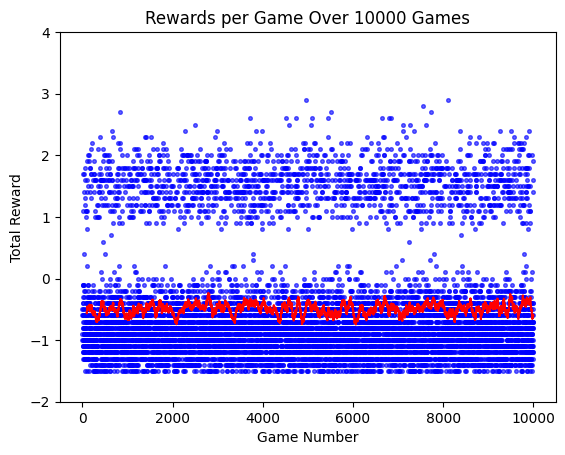

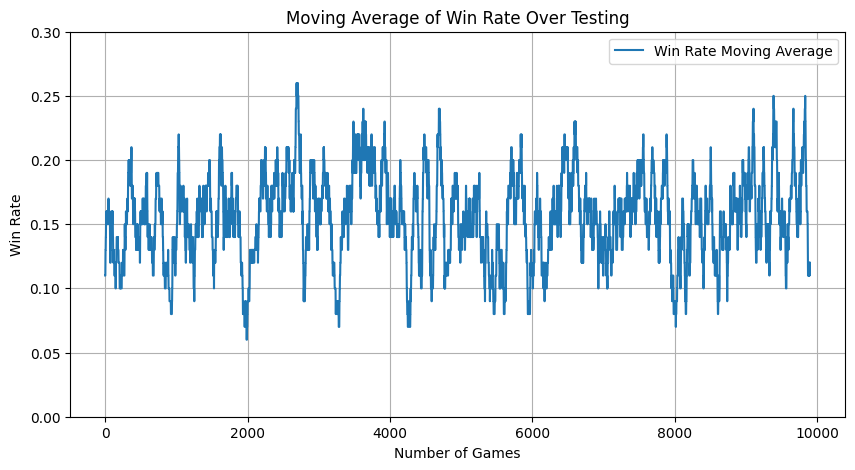

In [30]:
game = Hangman('words_250000_train.txt')

rewards = []
win_history = []
wins = 0
correct_guesses = 0
total_guesses = 0
num_games = 10000

class_labels = model.classes_

for game_index in range(num_games):
    game.reset()  # Reset the hangman game
    already_guessed = set()  # Reset the guessed letters
    current_display = game.display.copy()
    total_reward = 0
    win = 0

    while True:
        data_line = [27 if letter == '_' else ord(letter) - 96 for letter in current_display] + [0] * (30 - len(current_display))
        percentage_discovered = len([1 for letter in current_display if letter != '_']) / len(current_display)
        letter_probabilities = (model if percentage_discovered < 0.6 else model2).predict_proba(np.array(data_line).reshape(1, -1))
        letter_probs = sorted(dict(zip(class_labels, letter_probabilities[0])).items(), key=lambda x: x[1], reverse=True)
        
        for letter, probability in letter_probs:
            if letter not in already_guessed:
                action = chr(letter + 96)
                break
        
        result, next_display = game.guess(action, verbose=False)

        if not result:
            reward = -0.1
        elif result == '!lost!':
            reward = -1
        else:
            reward = count_correct(current_display, next_display) / 10 if "_" in next_display else 1

        # print(current_display, percentage_discovered, action, next_display, result, game.secret_word)
        # print([(chr(letter + 96), prob) for letter, prob in letter_probs])

        already_guessed.add(ord(action) - 96)
        current_display = next_display
        total_reward += reward

        total_guesses += 1
        if reward > 0:
            correct_guesses += 1

        if "_" not in next_display:
            win = 1
            wins += 1

        if result == '!lost!' or "_" not in next_display:
            break

    win_history.append(win)
    rewards.append(total_reward)

    if (game_index + 1) % (num_games // 100) == 0:
        print(f"Completed {game_index + 1} games")

print(f'Win rate: {round(100 * wins / num_games, 2)}%')
print(f'Accuracy: {round(100 * correct_guesses / total_guesses, 2)}%')

# Calculate the moving average of the rewards
window_size = (num_games // 100)  # This sets the window size for the moving average
ma_rewards = moving_average(rewards, window_size)

plt.scatter(range(len(rewards)), rewards, alpha=0.6, color='blue', s=7)
plt.ylim(-2, 4)

# Add the moving average line plot
plt.plot(range(window_size - 1, len(ma_rewards) + window_size - 1), ma_rewards, color='red',
         label='Moving Average')

plt.title(f'Rewards per Game Over {num_games} Games')
plt.xlabel('Game Number')
plt.ylabel('Total Reward')
plt.show()

# Calculate moving average of the win rate
window_size = (num_games // 100)  # Adjust the window size based on your preference
win_rate_ma = moving_average(win_history, window_size)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(len(win_rate_ma)), win_rate_ma, label='Win Rate Moving Average')
plt.title(f'Moving Average of Win Rate Over Testing')
plt.xlabel('Number of Games')
plt.ylabel('Win Rate')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.3)
plt.show()